In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
from pylab import *
from mpl_toolkits import mplot3d

In [3]:
π  = pi
a0 = 4

---
# SC
### Ej. El azufre cristaliza en una red cúbica simple, por lo que tiene un átomo por cada punto de la red. Pongamos cada átomo justo en cada punto de la red.

$
\begin{align}
\begin{bmatrix}
a_{1x}&a_{1y}&a_{1z} \\
a_{2x}&a_{2y}&a_{2z} \\
a_{3x}&a_{3y}&a_{3z}
\end{bmatrix} 
\begin{bmatrix}
b_{1x}&b_{1y}&b_{1z} \\
b_{2x}&b_{2y}&b_{2z} \\
b_{3x}&b_{3y}&b_{3z}
\end{bmatrix} =
\begin{bmatrix}
2\pi& 0 & 0\\
0 & 2\pi & 0\\
0 & 0 &2\pi
\end{bmatrix}
 \Longrightarrow  
\begin{bmatrix}
b_{1x}&b_{1y}&b_{1z} \\
b_{2x}&b_{2y}&b_{2z} \\
b_{3x}&b_{3y}&b_{3z}
\end{bmatrix} =2 \pi 
\begin{bmatrix}
a_{1x}&a_{1y}&a_{1z} \\
a_{2x}&a_{2y}&a_{2z} \\
a_{3x}&a_{3y}&a_{3z}
\end{bmatrix} ^{-1}
\end{align}
$

In [4]:
# Vectores del espacio real
a1 = array([1,0,0])*a0
a2 = array([0,1,0])*a0
a3 = array([0,0,1])*a0

A  = array( [a1,a2,a3] )
B  = 2*π*linalg.inv(A)

# Vectores del espacio recíproco
b1 = B[:,0]
b2 = B[:,1]
b3 = B[:,2]

## Puntos de la red
$
\begin{align}
P = u_1\vec{a}_1 + u_2\vec{a}_2 + u_3\vec{a}_3
\end{align}
$

donde $u_i=-n,-n+1,\ldots,n-1,n$

**Construcción de la red**. 
Definimos $u$ y $a$ de la siguiente manera y tomamos el producto de dichas variables con el fin de obtener los puntos $P$ de la red.

$
\begin{align}
u = \begin{pmatrix}
-n&-n&-n \\
-n&-n&-n+1 \\
 & \vdots & \\
  -n&-n&n+1\\
 -n&-n&n\\
 -n&-n+1&-n\\
 -n&-n+1&-n+1\\
  & \vdots &\\
\end{pmatrix}\,, \quad 
a = \begin{pmatrix}
\vec{a}_1 \\
\vec{a}_2 \\
\vec{a}_3 
\end{pmatrix}
\end{align}
$

$
P = u\cdot a = \begin{pmatrix}
-n&-n&-n \\
-n&-n&-n+1 \\
 & \vdots & \\
  -n&-n&n+1\\
 -n&-n&n\\
 -n&-n+1&-n\\
 -n&-n+1&-n+1\\
  & \vdots &\\
\end{pmatrix} \cdot
\begin{pmatrix}
\vec{a}_1 \\
\vec{a}_2 \\
\vec{a}_3 
\end{pmatrix}
$

In [5]:
n  = 2
u1,u2,u3 = meshgrid( arange(-n,n+1),arange(-n,n+1),arange(-n,n+1)  )

u1 = u1.reshape((2*n+1)**3,)
u2 = u2.reshape((2*n+1)**3,)
u3 = u3.reshape((2*n+1)**3,)

u  = column_stack((u1,u2,u3))
a  = array([a1,a2,a3])

P  = dot(u,a)

## Puntos de la red recíproca
$
\begin{align}
G = v_1\vec{b}_1 + v_2\vec{b}_2 + v_3\vec{b}_3
\end{align}
$

donde $v_i=-n,-n+1,\ldots,n-1,n$

**Construcción de la red**. 
Definimos $v$ y $b$ de la siguiente manera y tomamos el producto de dichas variables con el fin de obtener los puntos $P$ de la red.

$
\begin{align}
v = \begin{pmatrix}
-n&-n&-n \\
-n&-n&-n+1 \\
 & \vdots & \\
  -n&-n&n+1\\
 -n&-n&n\\
 -n&-n+1&-n\\
 -n&-n+1&-n+1\\
  & \vdots &\\
\end{pmatrix}\,, \quad 
b = \begin{pmatrix}
\vec{b}_1 \\
\vec{b}_2 \\
\vec{b}_3 
\end{pmatrix}
\end{align}
$

$
G = v\cdot b = \begin{pmatrix}
-n&-n&-n \\
-n&-n&-n+1 \\
 & \vdots & \\
  -n&-n&n+1\\
 -n&-n&n\\
 -n&-n+1&-n\\
 -n&-n+1&-n+1\\
  & \vdots &\\
\end{pmatrix} \cdot
\begin{pmatrix}
\vec{b}_1 \\
\vec{b}_2 \\
\vec{b}_3 
\end{pmatrix}
$

In [6]:
v1,v2,v3 = meshgrid( arange(-n,n+1),arange(-n,n+1),arange(-n,n+1)  )

v1 = v1.reshape((2*n+1)**3,)
v2 = v2.reshape((2*n+1)**3,)
v3 = v3.reshape((2*n+1)**3,)

u  = column_stack((v1,v2,v3))
a  = array([b1,b2,b3])

G  = dot(u,a)

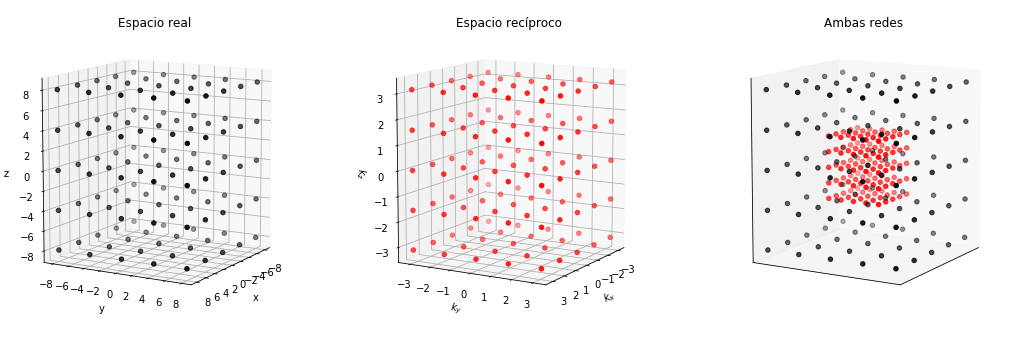

In [7]:
fig = plt.figure(figsize=(18,6))

# Graficacion de la red en el espacio real
ax_real = fig.add_subplot(1, 3, 1, projection='3d')
ax_real.scatter(P.T[0],P.T[1],P.T[2],c='k')

# Graficacion en la red recíproca
ax_recip = fig.add_subplot(1, 3, 2, projection='3d')
ax_recip.scatter(G.T[0],G.T[1],G.T[2],c='r')

# Graficación de ambas redes superpuestas
ax_both = fig.add_subplot(1, 3, 3, projection='3d')
ax_both.scatter(P.T[0],P.T[1],P.T[2],c='k')
ax_both.scatter(G.T[0],G.T[1],G.T[2],c='r')

# Título y etiquetas de los ejes
ax_real.set_title('Espacio real')
ax_real.set_xlabel('x')
ax_real.set_ylabel('y')
ax_real.set_zlabel('z')
ax_real.view_init(10, 30)

ax_recip.set_title('Espacio recíproco')
ax_recip.set_xlabel('$k_x$')
ax_recip.set_ylabel('$k_y$')
ax_recip.set_zlabel('$k_z$')
ax_recip.view_init(10, 30)

ax_both.set_title('Ambas redes')
ax_both.set_xticks([])
ax_both.set_yticks([])
ax_both.set_zticks([])
ax_both.view_init(10, 30)

# Activación interactiva en la graficación

In [8]:
# Es necesario ejecutar dos veces con el fin de evitar errores.
%matplotlib notebook 
%matplotlib notebook 

# Factor de estructura (SC)

$
\begin{align}
S_{\vec{G}} = \sum_j f_j e^{-i\vec{G}\cdot\vec{r_j}} = f e^{-i\vec{G}\cdot\vec{P}}
\end{align}
$

In [9]:
f  = 4
θ  = array( [ -1J*dot(G[n],P[n]) for n in range(len(G)) ] )
SG = f*exp(θ)
I  = real(conj(SG)*SG)

<IPython.core.display.Javascript object>


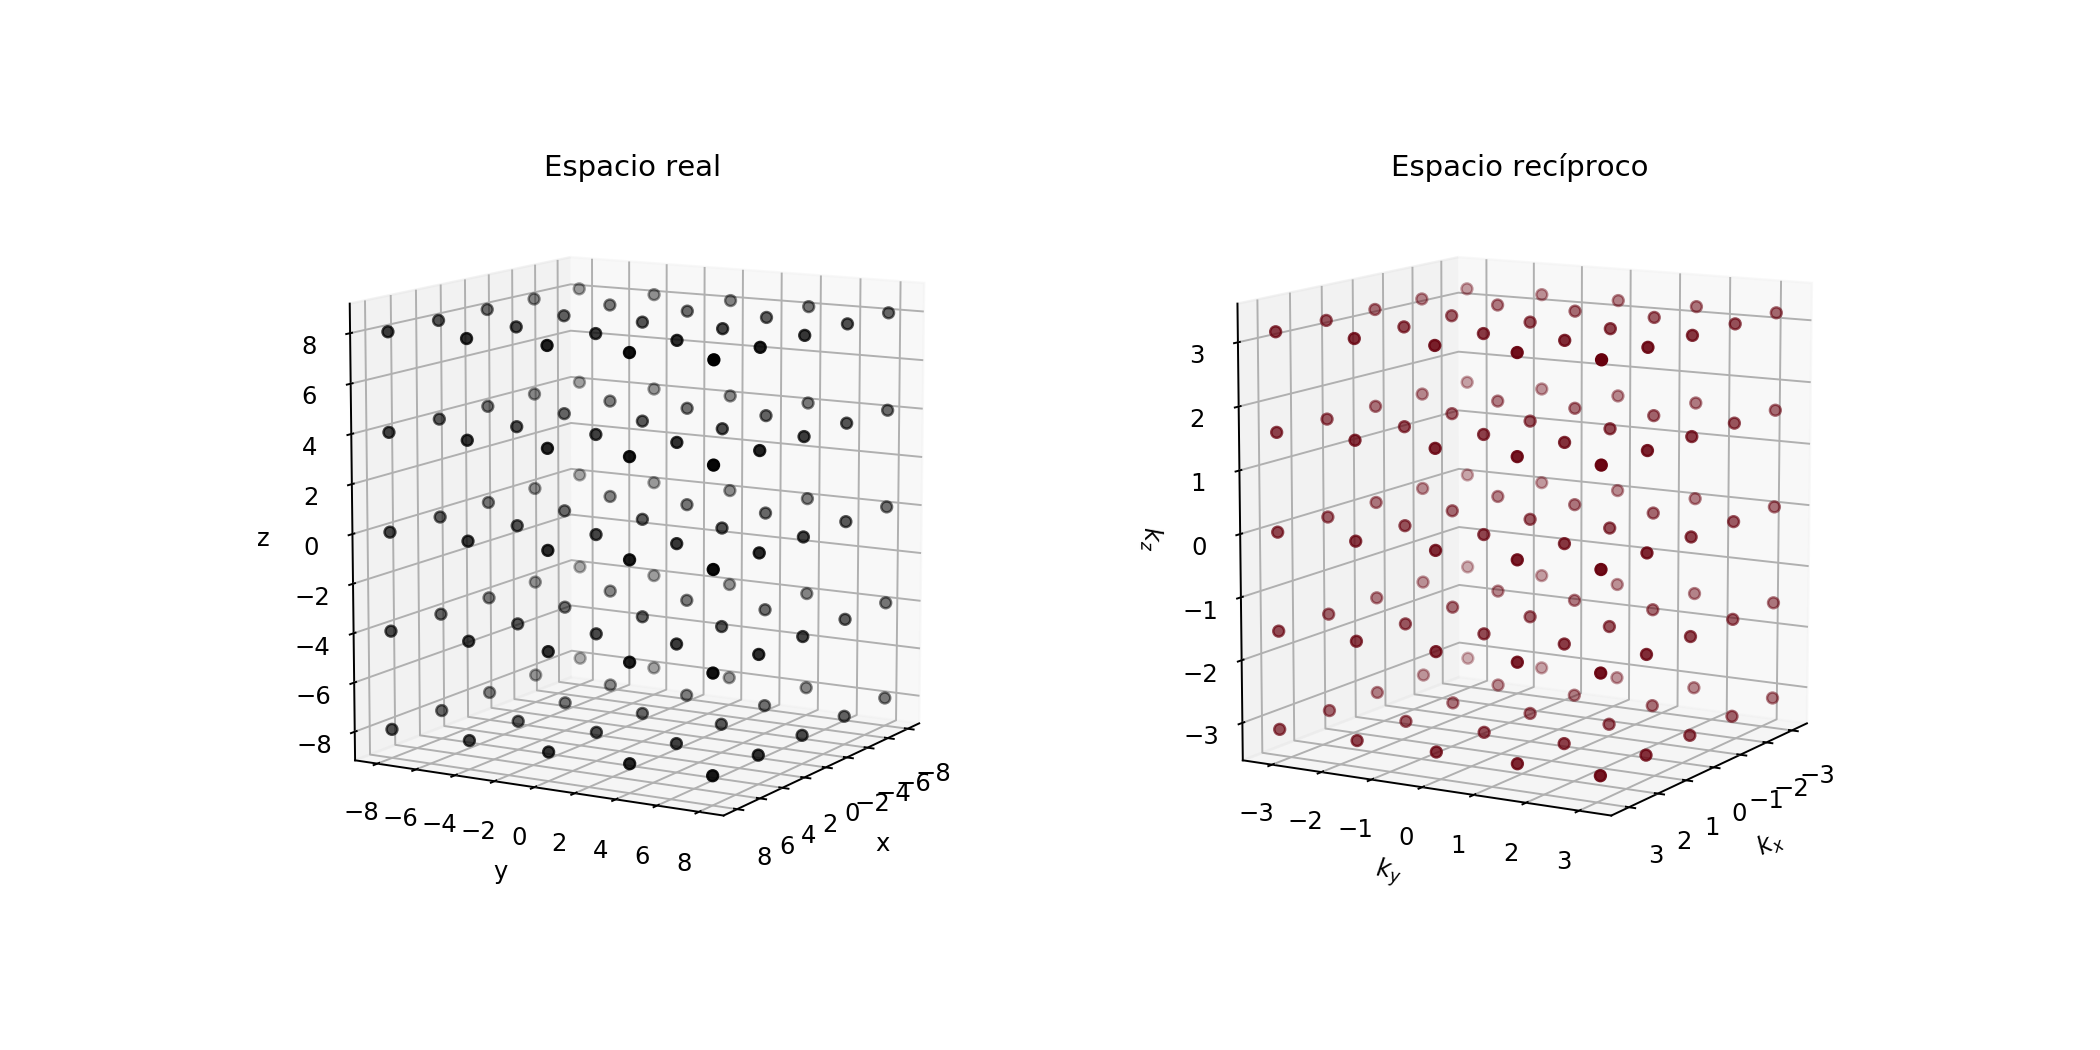

In [10]:
fig = plt.figure(figsize=(12,6))

# Graficacion de la red en el espacio real
ax_real = fig.add_subplot(1, 2, 1, projection='3d')
ax_real.scatter(P.T[0],P.T[1],P.T[2],c='k')

# Graficacion en la red recíproca
ax_recip = fig.add_subplot(1, 2, 2, projection='3d')
ax_recip.scatter(G.T[0],G.T[1],G.T[2],c=I,cmap='Reds_r' )

# Título y etiquetas de los ejes
ax_real.set_title('Espacio real')
ax_real.set_xlabel('x')
ax_real.set_ylabel('y')
ax_real.set_zlabel('z')
ax_real.view_init(10, 30)

ax_recip.set_title('Espacio recíproco')
ax_recip.set_xlabel('$k_x$')
ax_recip.set_ylabel('$k_y$')
ax_recip.set_zlabel('$k_z$')
ax_recip.view_init(10, 30)

---
# BCC

In [11]:
# Vectores del espacio real
a1 = array([1,0,0])*a0
a2 = array([0,1,0])*a0
a3 = array([0,0,1])*a0

A  = array( [a1,a2,a3] )
B  = 2*π*linalg.inv(A)

# Vectores del espacio recíproco
b1 = B[:,0]
b2 = B[:,1]
b3 = B[:,2]

## Puntos de la red
$
\begin{align}
r_j = \bigg(x_j\vec{a}_1+y_j\vec{a}_2+z_j\vec{a}_3\bigg)+u_1\vec{a}_1 + u_2\vec{a}_2 + u_3\vec{a}_3 \\
\end{align}
$

donde $u_i=-n,-n+1,\ldots,n-1,n$ y $j=1,2$. 

En el caso de $j=1$ tenemos que $(x_1,y_1,z_1)=(0,0,0)$ y en $j=2$ tenemos que $(x_1,y_1,z_1)=(1/2,1/2,1/2)$.

In [12]:
n  = 2
u1,u2,u3 = meshgrid( arange(-n,n+1),arange(-n,n+1),arange(-n,n+1)  )

u1 = u1.reshape((2*n+1)**3,)
u2 = u2.reshape((2*n+1)**3,)
u3 = u3.reshape((2*n+1)**3,)

u  = column_stack((u1,u2,u3))
a  = array([a1,a2,a3])
x1 = array([0,0,0])
x2 = array([1/2,1/2,1/2])

r1 = add( dot(u,a), dot(x1,a) )
r2 = add( dot(u,a), dot(x2,a) )

In [13]:
v1,v2,v3 = meshgrid( arange(-n,n+1),arange(-n,n+1),arange(-n,n+1)  )

v1 = v1.reshape((2*n+1)**3,)
v2 = v2.reshape((2*n+1)**3,)
v3 = v3.reshape((2*n+1)**3,)

u  = column_stack((v1,v2,v3))
a  = array([b1,b2,b3])

G  = dot(u,a)

<IPython.core.display.Javascript object>


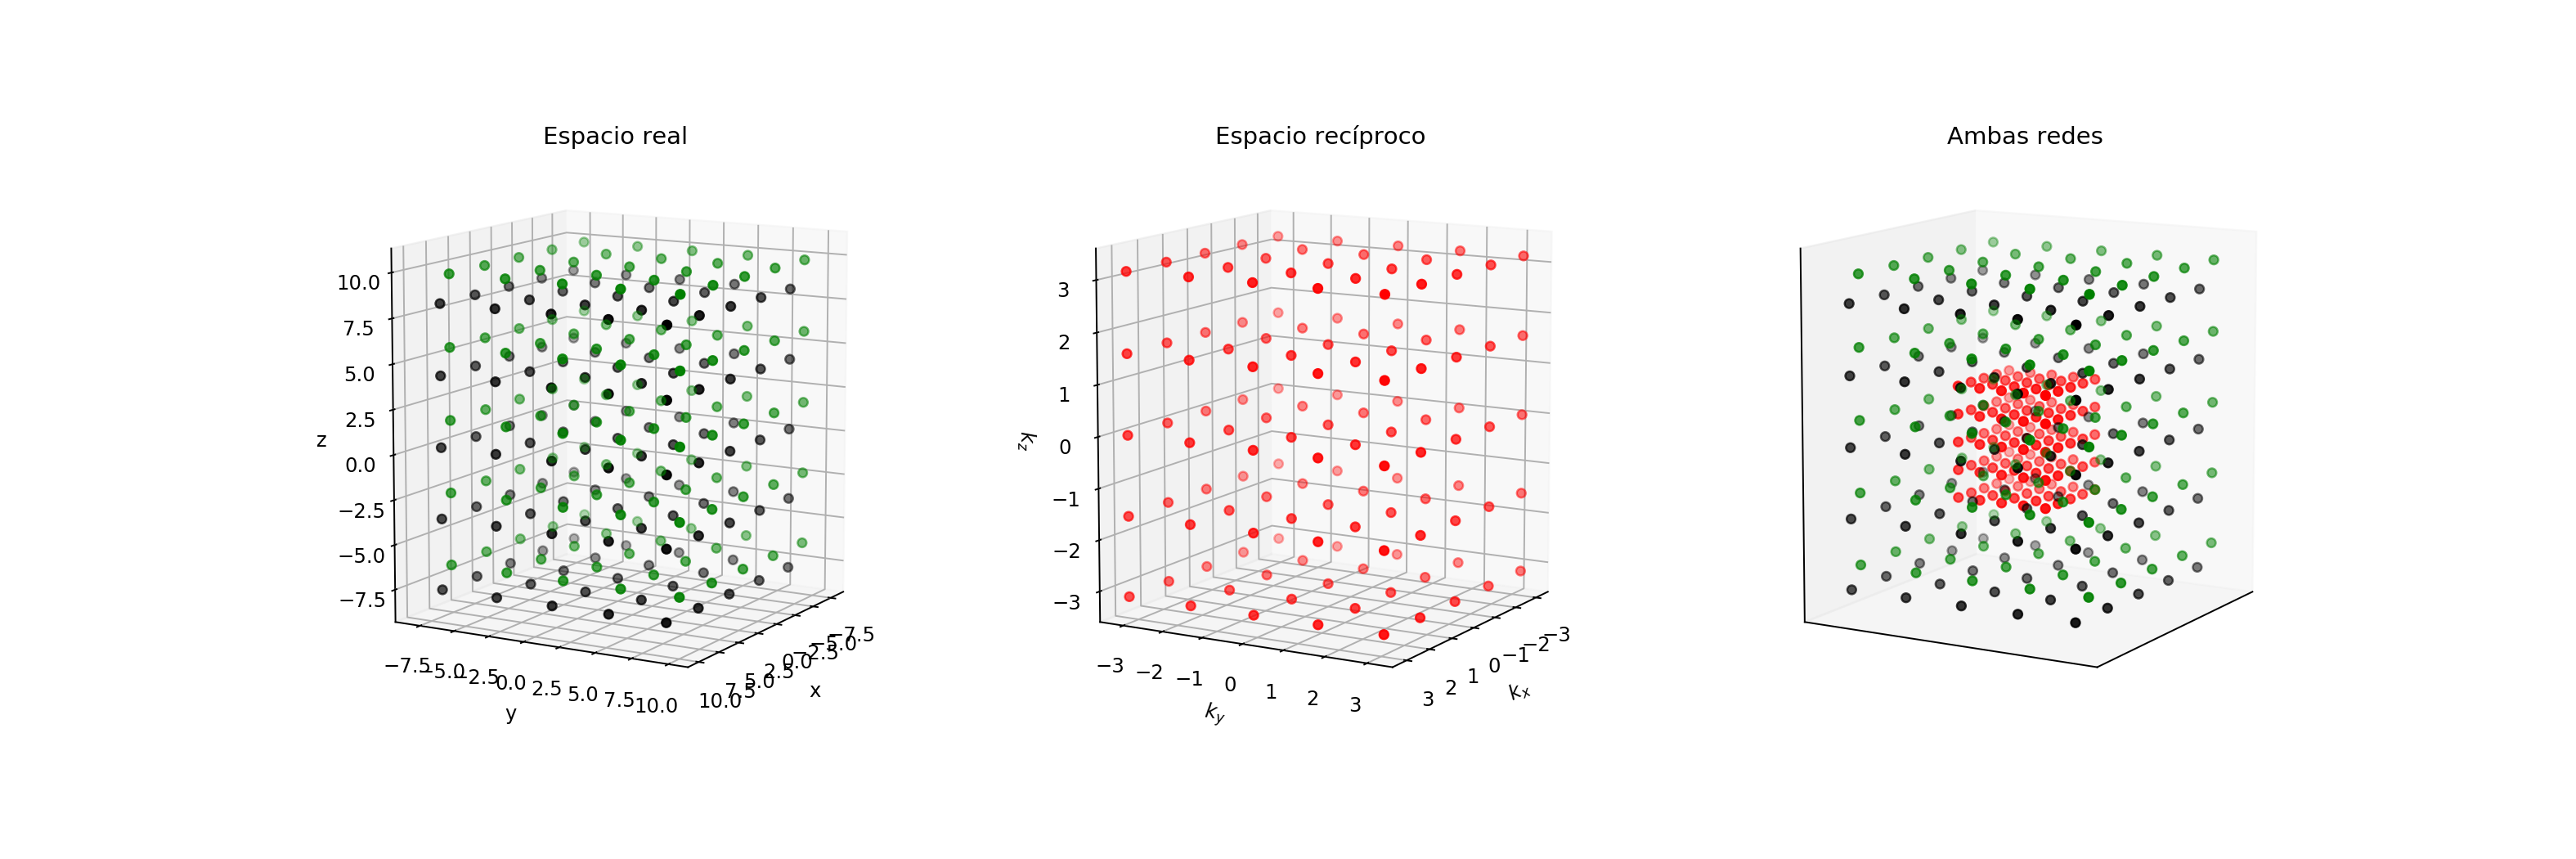

In [14]:
fig = plt.figure(figsize=(18,6))

# Graficacion de la red en el espacio real
ax_real = fig.add_subplot(1, 3, 1, projection='3d')
ax_real.scatter(r1.T[0],r1.T[1],r1.T[2],c='k')
ax_real.scatter(r2.T[0],r2.T[1],r2.T[2],c='g')

# Graficacion en la red recíproca
ax_recip = fig.add_subplot(1, 3, 2, projection='3d')
ax_recip.scatter(G.T[0],G.T[1],G.T[2],c='r')

# Graficación de ambas redes superpuestas
ax_both = fig.add_subplot(1, 3, 3, projection='3d')
ax_both.scatter(r1.T[0],r1.T[1],r1.T[2],c='k')
ax_both.scatter(r2.T[0],r2.T[1],r2.T[2],c='g')
ax_both.scatter(G.T[0],G.T[1],G.T[2],c='r')

# Título y etiquetas de los ejes
ax_real.set_title('Espacio real')
ax_real.set_xlabel('x')
ax_real.set_ylabel('y')
ax_real.set_zlabel('z')
ax_real.view_init(10, 30)

ax_recip.set_title('Espacio recíproco')
ax_recip.set_xlabel('$k_x$')
ax_recip.set_ylabel('$k_y$')
ax_recip.set_zlabel('$k_z$')
ax_recip.view_init(10, 30)

ax_both.set_title('Ambas redes')
ax_both.set_xticks([])
ax_both.set_yticks([])
ax_both.set_zticks([])
ax_both.view_init(10, 30)

# Factor de estructura

$
\begin{align}
S_{\vec{G}} = \sum_j f_j e^{-i\vec{G}\cdot\vec{r_j}} = f e^{-i\vec{G}\cdot\vec{r_1}}+f e^{-i\vec{G}\cdot\vec{r_2}}
\end{align}
$

In [15]:
f  = 4
θ1  = array( [ -1J*dot(G[n],r1[n]) for n in range(len(G)) ] )
θ2  = array( [ -1J*dot(G[n],r2[n]) for n in range(len(G)) ] )
SG = f*exp(θ1)+f*exp(θ2)
I  = real(conj(SG)*SG)

<IPython.core.display.Javascript object>


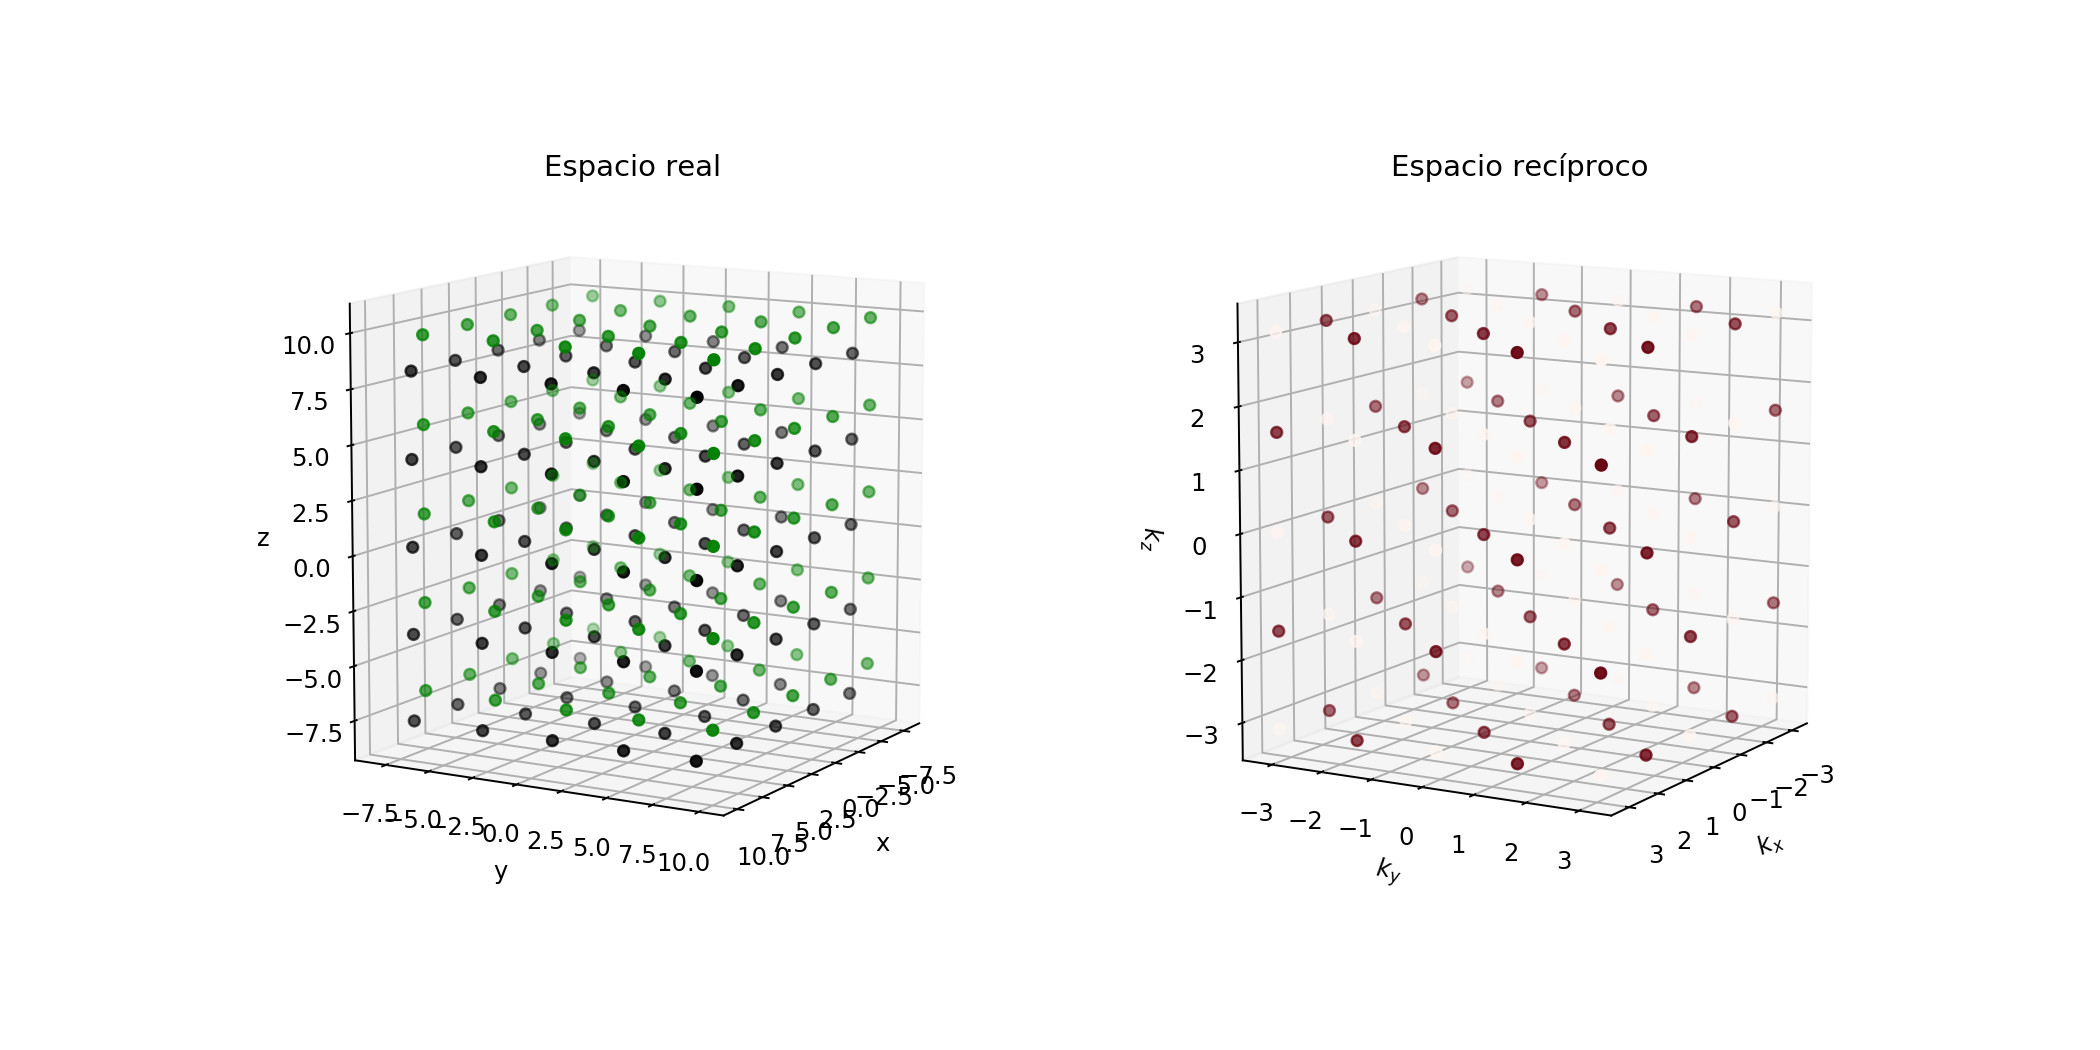

In [16]:
fig = plt.figure(figsize=(12,6))

# Graficacion de la red en el espacio real
ax_real = fig.add_subplot(1, 2, 1, projection='3d')
ax_real.scatter(r1.T[0],r1.T[1],r1.T[2],c='k')
ax_real.scatter(r2.T[0],r2.T[1],r2.T[2],c='g')

# Graficacion en la red recíproca
ax_recip = fig.add_subplot(1, 2, 2, projection='3d')
ax_recip.scatter(G.T[0],G.T[1],G.T[2],c=I,cmap='Reds_r' )

# Título y etiquetas de los ejes
ax_real.set_title('Espacio real')
ax_real.set_xlabel('x')
ax_real.set_ylabel('y')
ax_real.set_zlabel('z')
ax_real.view_init(10, 30)

ax_recip.set_title('Espacio recíproco')
ax_recip.set_xlabel('$k_x$')
ax_recip.set_ylabel('$k_y$')
ax_recip.set_zlabel('$k_z$')
ax_recip.view_init(10, 30)

---
# FCC

In [17]:
# Vectores del espacio real
a1 = array([1,0,0])*a0
a2 = array([0,1,0])*a0
a3 = array([0,0,1])*a0

A  = array( [a1,a2,a3] )
B  = 2*π*linalg.inv(A)

# Vectores del espacio recíproco
b1 = B[:,0]
b2 = B[:,1]
b3 = B[:,2]

## Puntos de la red
$
\begin{align}
r_j = \bigg(x_j\vec{a}_1+y_j\vec{a}_2+z_j\vec{a}_3\bigg)+u_1\vec{a}_1 + u_2\vec{a}_2 + u_3\vec{a}_3 \\
\end{align}
$

donde $u_i=-n,-n+1,\ldots,n-1,n$ y $j=1,2,3,4$. 

En el caso de $j=1$ tenemos que $(x_1,y_1,z_1)=(0,0,0)$, en $j=2$ tenemos que $(x_1,y_1,z_1)=(0,1/2,1/2)$, en $j=3$ tenemos que $(x_1,y_1,z_1)=(1/2,0,1/2)$ y en $j=4$ tenemos que $(x_1,y_1,z_1)=(1/2,1/2,0)$.

In [18]:
n  = 2
u1,u2,u3 = meshgrid( arange(-n,n+1),arange(-n,n+1),arange(-n,n+1)  )

u1 = u1.reshape((2*n+1)**3,)
u2 = u2.reshape((2*n+1)**3,)
u3 = u3.reshape((2*n+1)**3,)

u  = column_stack((u1,u2,u3))
a  = array([a1,a2,a3])
x1 = array([0,0,0])
x2 = array([0,1/2,1/2])
x3 = array([1/2,0,1/2])
x4 = array([1/2,1/2,0])

r1 = add( dot(u,a), dot(x1,a) )
r2 = add( dot(u,a), dot(x2,a) )
r3 = add( dot(u,a), dot(x3,a) )
r4 = add( dot(u,a), dot(x4,a) )

In [19]:
G = []
for v1 in arange(-n,n+1):
    for v2 in arange(-n,n+1):
        for v3 in arange(-n,n+1):
            G.append( v1*b1+v2*b2+v3*b3 )
G = array(G)

<IPython.core.display.Javascript object>


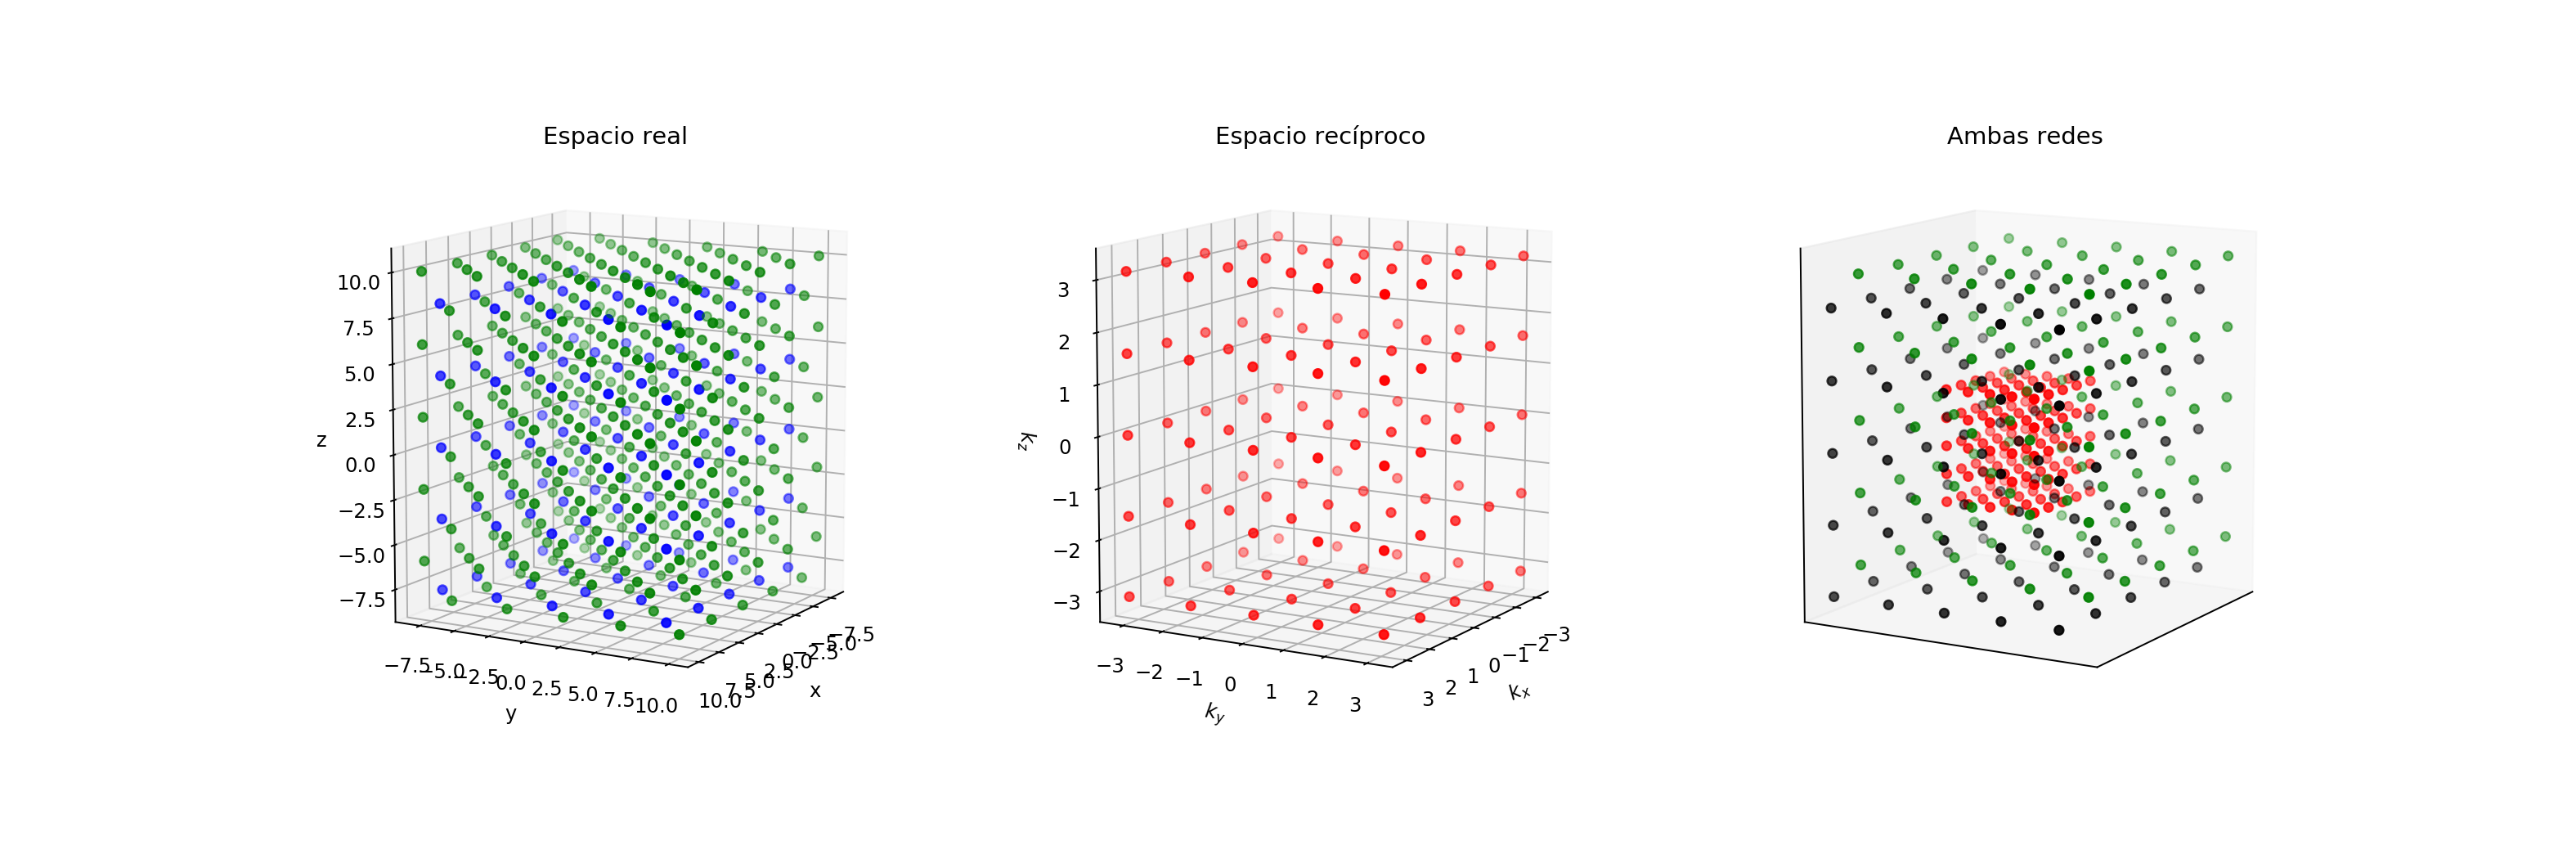

In [20]:
fig = plt.figure(figsize=(18,6))

# Graficacion de la red en el espacio real
ax_real = fig.add_subplot(1, 3, 1, projection='3d')
ax_real.scatter(r1.T[0],r1.T[1],r1.T[2],c='b')
ax_real.scatter(r2.T[0],r2.T[1],r2.T[2],c='g')
ax_real.scatter(r3.T[0],r3.T[1],r3.T[2],c='g')
ax_real.scatter(r4.T[0],r4.T[1],r4.T[2],c='g')

# Graficacion en la red recíproca
ax_recip = fig.add_subplot(1, 3, 2, projection='3d')
ax_recip.scatter(G.T[0],G.T[1],G.T[2],c='r')

# Graficación de ambas redes superpuestas
ax_both = fig.add_subplot(1, 3, 3, projection='3d')
ax_both.scatter(r1.T[0],r1.T[1],r1.T[2],c='k')
ax_both.scatter(r2.T[0],r2.T[1],r2.T[2],c='g')
ax_both.scatter(G.T[0],G.T[1],G.T[2],c='r')

# Título y etiquetas de los ejes
ax_real.set_title('Espacio real')
ax_real.set_xlabel('x')
ax_real.set_ylabel('y')
ax_real.set_zlabel('z')
ax_real.view_init(10, 30)

ax_recip.set_title('Espacio recíproco')
ax_recip.set_xlabel('$k_x$')
ax_recip.set_ylabel('$k_y$')
ax_recip.set_zlabel('$k_z$')
ax_recip.view_init(10, 30)

ax_both.set_title('Ambas redes')
ax_both.set_xticks([])
ax_both.set_yticks([])
ax_both.set_zticks([])
ax_both.view_init(10, 30)

# Factor de estructura

$
\begin{align}
S_{\vec{G}} = \sum_j f_j e^{-i\vec{G}\cdot\vec{r_j}} = f e^{-i\vec{G}\cdot\vec{r_1}}+f e^{-i\vec{G}\cdot\vec{r_2}}
+f e^{-i\vec{G}\cdot\vec{r_3}}+f e^{-i\vec{G}\cdot\vec{r_4}}
\end{align}
$

In [21]:
f  = 4; 
θ1  = array( [ -1J*dot(G[n],r1[n]) for n in range(len(G)) ] )
θ2  = array( [ -1J*dot(G[n],r2[n]) for n in range(len(G)) ] )
θ3  = array( [ -1J*dot(G[n],r3[n]) for n in range(len(G)) ] )
θ4  = array( [ -1J*dot(G[n],r4[n]) for n in range(len(G)) ] )
SG = f*exp(θ1)+f*exp(θ2)+f*exp(θ3)+f*exp(θ4)
I  = real(conj(SG)*SG)

<IPython.core.display.Javascript object>


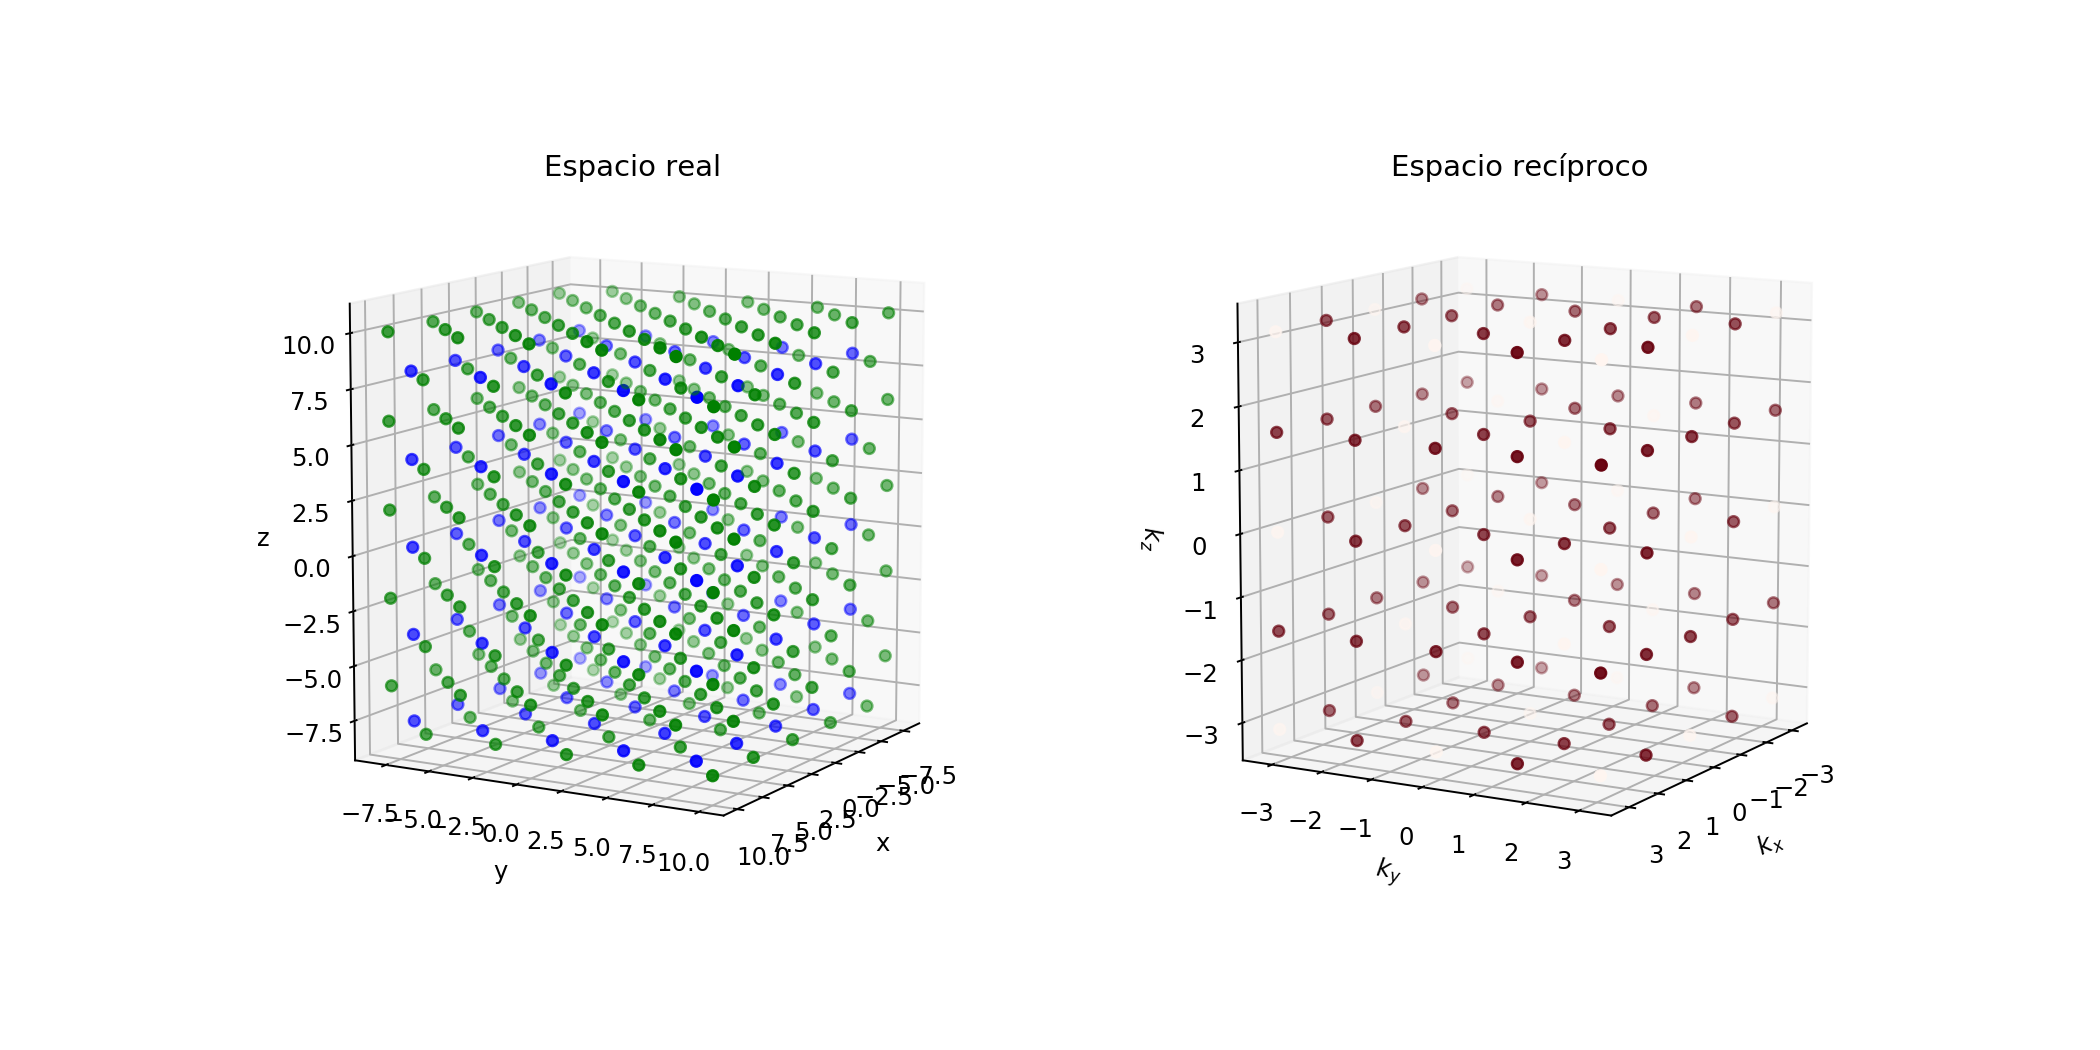

In [22]:
fig = plt.figure(figsize=(12,6))

# Graficacion de la red en el espacio real
ax_real = fig.add_subplot(1, 2, 1, projection='3d')
ax_real.scatter(r1.T[0],r1.T[1],r1.T[2],c='b')
ax_real.scatter(r2.T[0],r2.T[1],r2.T[2],c='g')
ax_real.scatter(r3.T[0],r3.T[1],r3.T[2],c='g')
ax_real.scatter(r4.T[0],r4.T[1],r4.T[2],c='g')

# Graficacion en la red recíproca
ax_recip = fig.add_subplot(1, 2, 2, projection='3d')
ax_recip.scatter(G.T[0],G.T[1],G.T[2],c=I,cmap='Reds_r' )

# Título y etiquetas de los ejes
ax_real.set_title('Espacio real')
ax_real.set_xlabel('x')
ax_real.set_ylabel('y')
ax_real.set_zlabel('z')
ax_real.view_init(10, 30)

ax_recip.set_title('Espacio recíproco')
ax_recip.set_xlabel('$k_x$')
ax_recip.set_ylabel('$k_y$')
ax_recip.set_zlabel('$k_z$')
ax_recip.view_init(10, 30)

---
# SC vs BCC vs FCC

In [23]:
# Vectores del espacio real
a1 = array([1,0,0])*a0
a2 = array([0,1,0])*a0
a3 = array([0,0,1])*a0

A  = array( [a1,a2,a3] )
B  = 2*π*linalg.inv(A)

# Vectores del espacio recíproco
b1 = B[:,0]
b2 = B[:,1]
b3 = B[:,2]

In [24]:
n  = 2
u1,u2,u3 = meshgrid( arange(-n,n+1),arange(-n,n+1),[1] ) # u_3 = 1

u1 = u1.reshape((2*n+1)**2,)
u2 = u2.reshape((2*n+1)**2,)
u3 = u3.reshape((2*n+1)**2,)

u  = column_stack((u1,u2,u3))
a  = array([a1,a2,a3])

# SC
r1_SC  = dot(u,a)

# BCC
x1 = array([0,0,0])
x2 = array([1/2,1/2,1/2])

r1_BCC = add( dot(u,a), dot(x1,a) )
r2_BCC = add( dot(u,a), dot(x2,a) )

# FCC
x1 = array([0,0,0])
x2 = array([0,1/2,1/2])
x3 = array([1/2,0,1/2])
x4 = array([1/2,1/2,0])

r1_FCC = add( dot(u,a), dot(x1,a) )
r2_FCC = add( dot(u,a), dot(x2,a) )
r3_FCC = add( dot(u,a), dot(x3,a) )
r4_FCC = add( dot(u,a), dot(x4,a) )

In [25]:
G = []
for v1 in arange(-n,n+1):
    for v2 in arange(-n,n+1):
        # for v3 in arange(-n,n+1):
            v3 = 1
            G.append( v1*b1+v2*b2+v3*b3 )
G = array(G)

In [26]:
# Factor de estructura SC
f  = 4
θ1  = array( [ -1J*dot(G[n],r1_SC[n]) for n in range(len(G)) ] )
SG_SC = f*exp(θ1)
I_SC  = real(conj(SG_SC)*SG_SC)

In [27]:
# Factor de estructura BCC
θ1  = array( [ -1J*dot(G[n],r1_BCC[n]) for n in range(len(G)) ] )
θ2  = array( [ -1J*dot(G[n],r2_BCC[n]) for n in range(len(G)) ] )
SG_BCC = f*exp(θ1)+f*exp(θ2)
I_BCC  = real(conj(SG_BCC)*SG_BCC)

In [28]:
# Factor de estructura FCC
θ1  = array( [ -1J*dot(G[n],r1_FCC[n]) for n in range(len(G)) ] )
θ2  = array( [ -1J*dot(G[n],r2_FCC[n]) for n in range(len(G)) ] )
θ3  = array( [ -1J*dot(G[n],r3_FCC[n]) for n in range(len(G)) ] )
θ4  = array( [ -1J*dot(G[n],r4_FCC[n]) for n in range(len(G)) ] )
SG_FCC = f*exp(θ1)+f*exp(θ2)+f*exp(θ3)+f*exp(θ4)
I_FCC  = real(conj(SG_FCC)*SG_FCC)

<IPython.core.display.Javascript object>


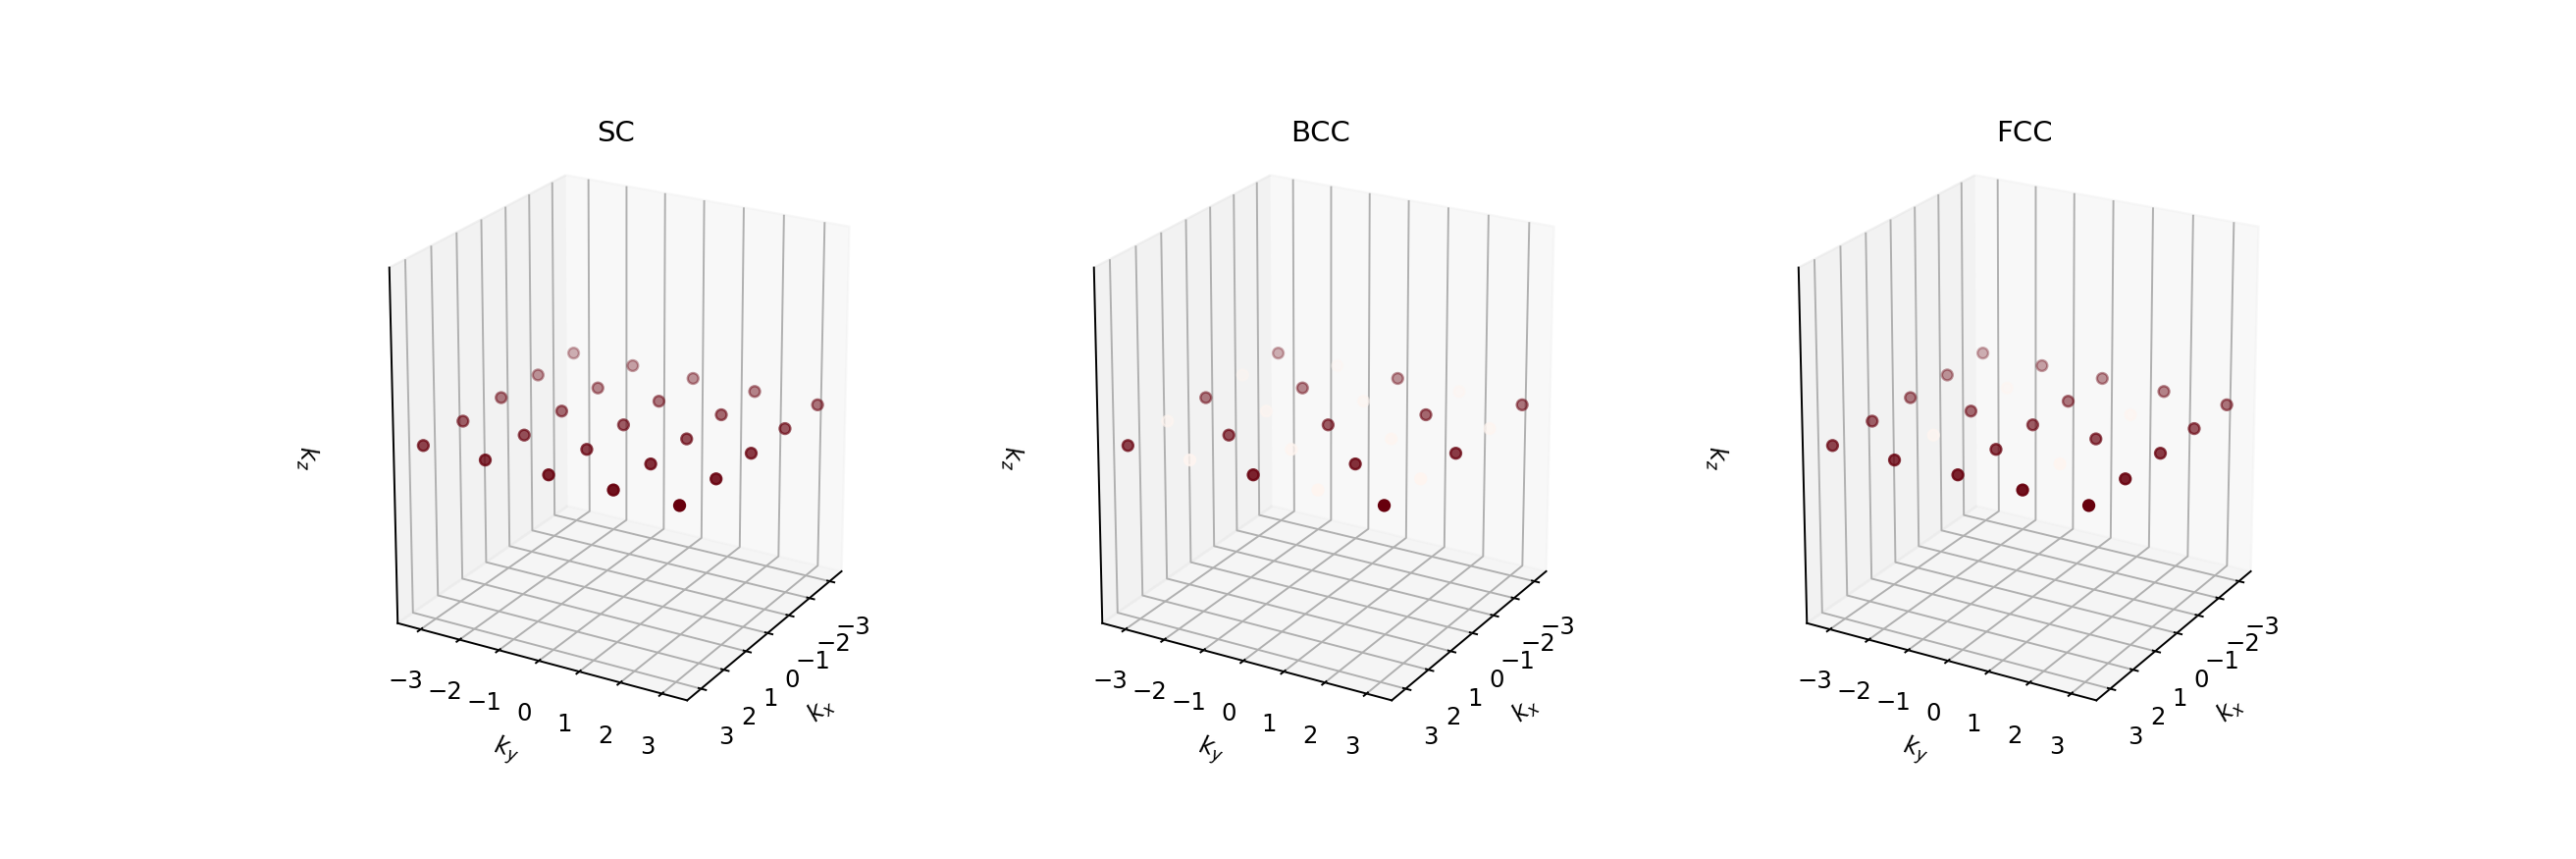

[]

In [29]:
fig = plt.figure(figsize=(15,5))

# SC
ax_recip0 = fig.add_subplot(1, 3, 1, projection='3d')
ax_recip0.scatter(G.T[0],G.T[1],G.T[2],c=I_SC,cmap='Reds_r')
ax_recip0.set_title('SC')


# BCC
ax_recip1 = fig.add_subplot(1, 3, 2, projection='3d')
ax_recip1.scatter(G.T[0],G.T[1],G.T[2],c=I_BCC,cmap='Reds_r')
ax_recip1.set_title('BCC')

# FCC
ax_recip2 = fig.add_subplot(1, 3, 3, projection='3d')
ax_recip2.scatter(G.T[0],G.T[1],G.T[2],c=I_FCC,cmap='Reds_r')
ax_recip2.set_title('FCC')

# Otras opciones (neat plot)
ax_recip0.view_init(20, 30)
ax_recip0.set_xlabel("$k_x$")
ax_recip0.set_ylabel("$k_y$")
ax_recip0.set_zlabel("$k_z$")
ax_recip0.set_zticks([])

ax_recip1.view_init(20, 30)
ax_recip1.set_xlabel("$k_x$")
ax_recip1.set_ylabel("$k_y$")
ax_recip1.set_zlabel("$k_z$")
ax_recip1.set_zticks([])

ax_recip2.view_init(20, 30)
ax_recip2.set_xlabel("$k_x$")
ax_recip2.set_ylabel("$k_y$")
ax_recip2.set_zlabel("$k_z$")
ax_recip2.set_zticks([])

---
# ClCs

In [30]:
fCl = 4
fCs = 1
θ1  = array( [ -1J*dot(G[n],r1_BCC[n]) for n in range(len(G)) ] )
θ2  = array( [ -1J*dot(G[n],r2_BCC[n]) for n in range(len(G)) ] )
SG_CsCl = fCl*exp(θ1)+fCs*exp(θ2)
I_CsCl  = real(conj(SG_CsCl)*SG_CsCl)

In [31]:
I_CsCl

array([ 9., 25.,  9., 25.,  9., 25.,  9., 25.,  9., 25.,  9., 25.,  9.,
       25.,  9., 25.,  9., 25.,  9., 25.,  9., 25.,  9., 25.,  9.])

In [32]:
I_BCC

array([1.62340179e-28, 6.40000000e+01, 2.39961565e-31, 6.40000000e+01,
       2.16110975e-28, 6.40000000e+01, 2.39961565e-31, 6.40000000e+01,
       2.39961565e-31, 6.40000000e+01, 2.39961565e-31, 6.40000000e+01,
       2.39961565e-31, 6.40000000e+01, 2.15965409e-30, 6.40000000e+01,
       2.39961565e-31, 6.40000000e+01, 2.15965409e-30, 6.40000000e+01,
       2.16110975e-28, 6.40000000e+01, 2.15965409e-30, 6.40000000e+01,
       1.61469523e-27])

<IPython.core.display.Javascript object>


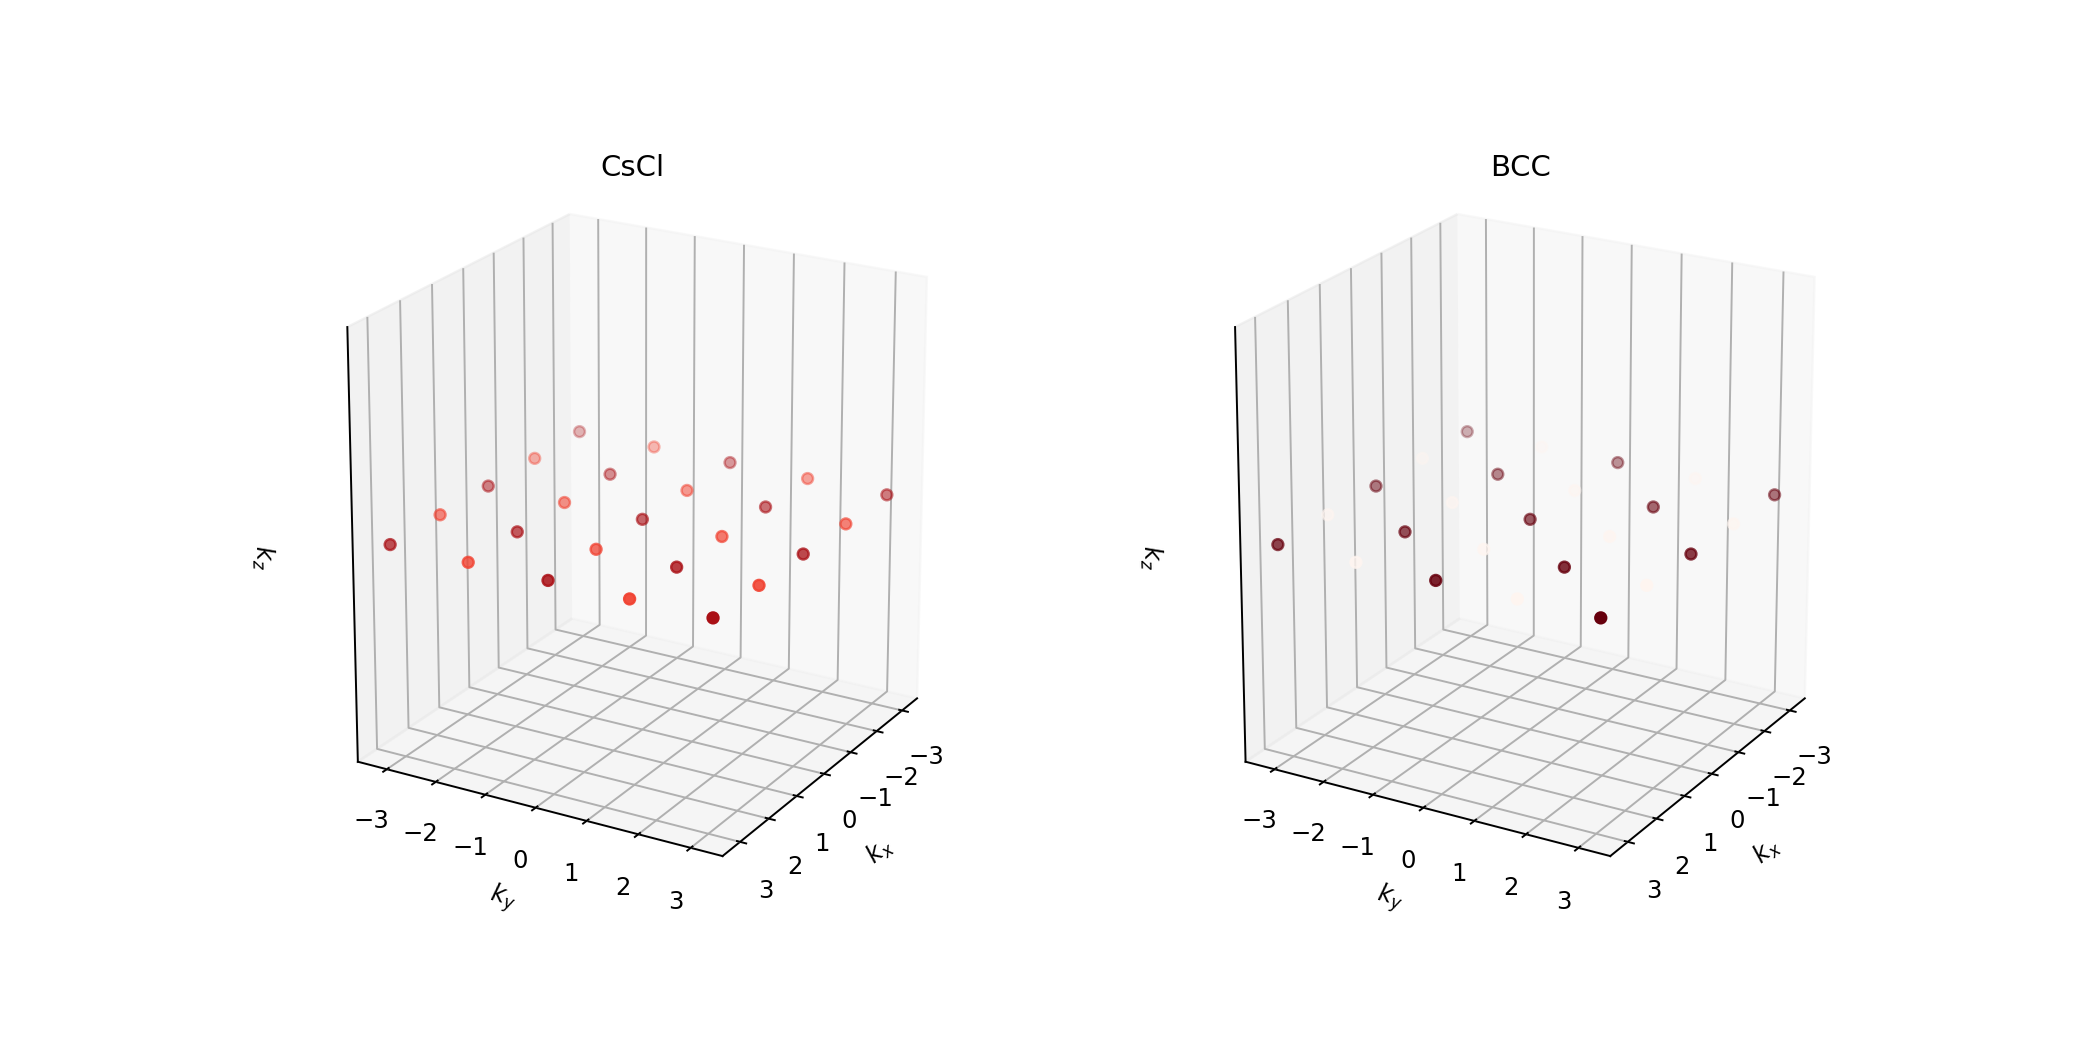

[]

In [33]:
fig = plt.figure(figsize=(12,6))

# Ejemplo: BCC con diferentes átomos
ax_recip0 = fig.add_subplot(1, 2, 1, projection='3d')
ax_recip0.scatter(G.T[0],G.T[1],G.T[2],c=I_CsCl,cmap='Reds_r',vmin=0,vmax=64)
ax_recip0.set_title('CsCl')

# Ejemplo: BCC con el mismo tipo de átomos
ax_recip1 = fig.add_subplot(1, 2, 2, projection='3d')
ax_recip1.scatter(G.T[0],G.T[1],G.T[2],c=I_BCC,cmap='Reds_r',vmin=0,vmax=64)
ax_recip1.set_title('BCC')

# Otras opciones (neat plot)
ax_recip0.view_init(20, 30)
ax_recip0.set_xlabel("$k_x$")
ax_recip0.set_ylabel("$k_y$")
ax_recip0.set_zlabel("$k_z$")
ax_recip0.set_zticks([])

ax_recip1.view_init(20, 30)
ax_recip1.set_xlabel("$k_x$")
ax_recip1.set_ylabel("$k_y$")
ax_recip1.set_zlabel("$k_z$")
ax_recip1.set_zticks([])